## Operation for datafile.csv

### 1.Importing the required libraries

In [51]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### 2. Read the dataset (datafile.csv)

In [52]:
df=pd.read_csv("datafile.csv")

In [53]:
df

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


In [54]:
df.shape

(13, 9)

### 3. Data Cleaning (datafile.csv)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-10  12 non-null     float64
 7   2010-11  12 non-null     float64
 8   2011-12  12 non-null     float64
dtypes: float64(8), object(1)
memory usage: 960.0+ bytes


In [56]:
#finding missing values
df.isnull().sum()

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64

In [57]:
df.dropna(inplace = True)

In [58]:
df.isnull().sum()

Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64

In [59]:
#finding duplicate values
df.duplicated().sum()

0

In [61]:
#identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Crop
Rice                   1
Wheat                  1
Coarse Cereals         1
Pulses                 1
Vegetables             1
Fruits                 1
Milk                   1
Eggs, Fish and Meat    1
Oilseeds               1
Sugarcane              1
Fibers                 1
All Agriculture        1
Name: count, dtype: int64
******************************


### 4. Exploratory Data Analysis (EDA)

In [62]:
df.describe()

,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
count,12.0,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,100.0,99.75000,102.000000,104.750000,106.416667,114.916667,121.916667,120.750000
std,0.0,6.64865,12.634728,10.963783,11.261022,15.900019,11.405408,12.800036
min,100.0,86.00000,85.000000,87.000000,80.000000,81.000000,99.000000,102.000000
25%,100.0,96.75000,96.250000,97.750000,101.250000,106.250000,116.250000,109.500000
50%,100.0,100.00000,100.000000,102.000000,107.500000,115.500000,122.500000,120.500000
75%,100.0,103.25000,104.750000,115.000000,113.000000,123.250000,129.250000,130.750000
max,100.0,109.00000,134.000000,124.000000,124.000000,146.000000,138.000000,140.000000


#### 4.1 Data Visualization

In [63]:
df.columns = ['Crop','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11','2011-12']

#### ◆ Histogram

In [64]:
import plotly.express as px

# Color palette for the histograms
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# EDA - Histogram
column_names = ['Crop','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11','2011-12']

for i, column in enumerate(column_names):
    fig = px.histogram(df, x=column, nbins=10, marginal='box',
                       labels={column: column})
    fig.update_layout(title=f'Histogram of {column}', xaxis_title=column, yaxis_title='Count',
                      plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)',
                      font=dict(size=12))
    fig.update_traces(marker_color=colors[i % len(colors)])
    fig.show()

#### ◆ HeatMap Visualization

In [65]:
df.corr(numeric_only = True)

,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
2004-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06,NaN,1.000000,0.770527,0.777277,0.481133,0.681730,0.525993,0.303643
2006-07,NaN,0.770527,1.000000,0.845929,0.683032,0.849392,0.534335,0.291179
2007-08,NaN,0.777277,0.845929,1.000000,0.876410,0.927607,0.443290,0.154336
2008-09,NaN,0.481133,0.683032,0.876410,1.000000,0.909046,0.452588,0.208287
2009-10,NaN,0.681730,0.849392,0.927607,0.909046,1.000000,0.576956,0.300505
2010-11,NaN,0.525993,0.534335,0.443290,0.452588,0.576956,1.000000,0.799403
2011-12,NaN,0.303643,0.291179,0.154336,0.208287,0.300505,0.799403,1.000000


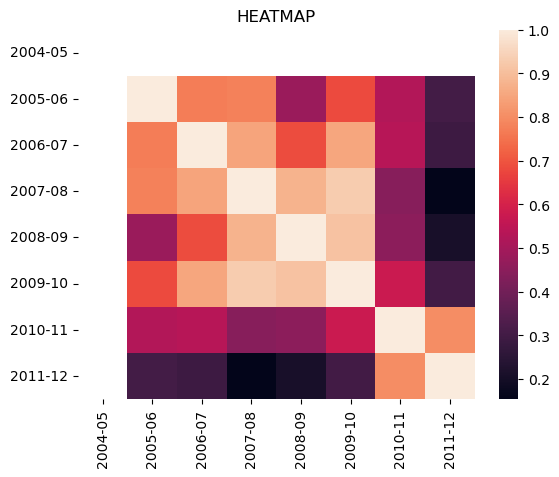

In [90]:
plt.title("HEATMAP");
sns.heatmap(df.corr(numeric_only = True));

#### ◆ BarGraph Visualization

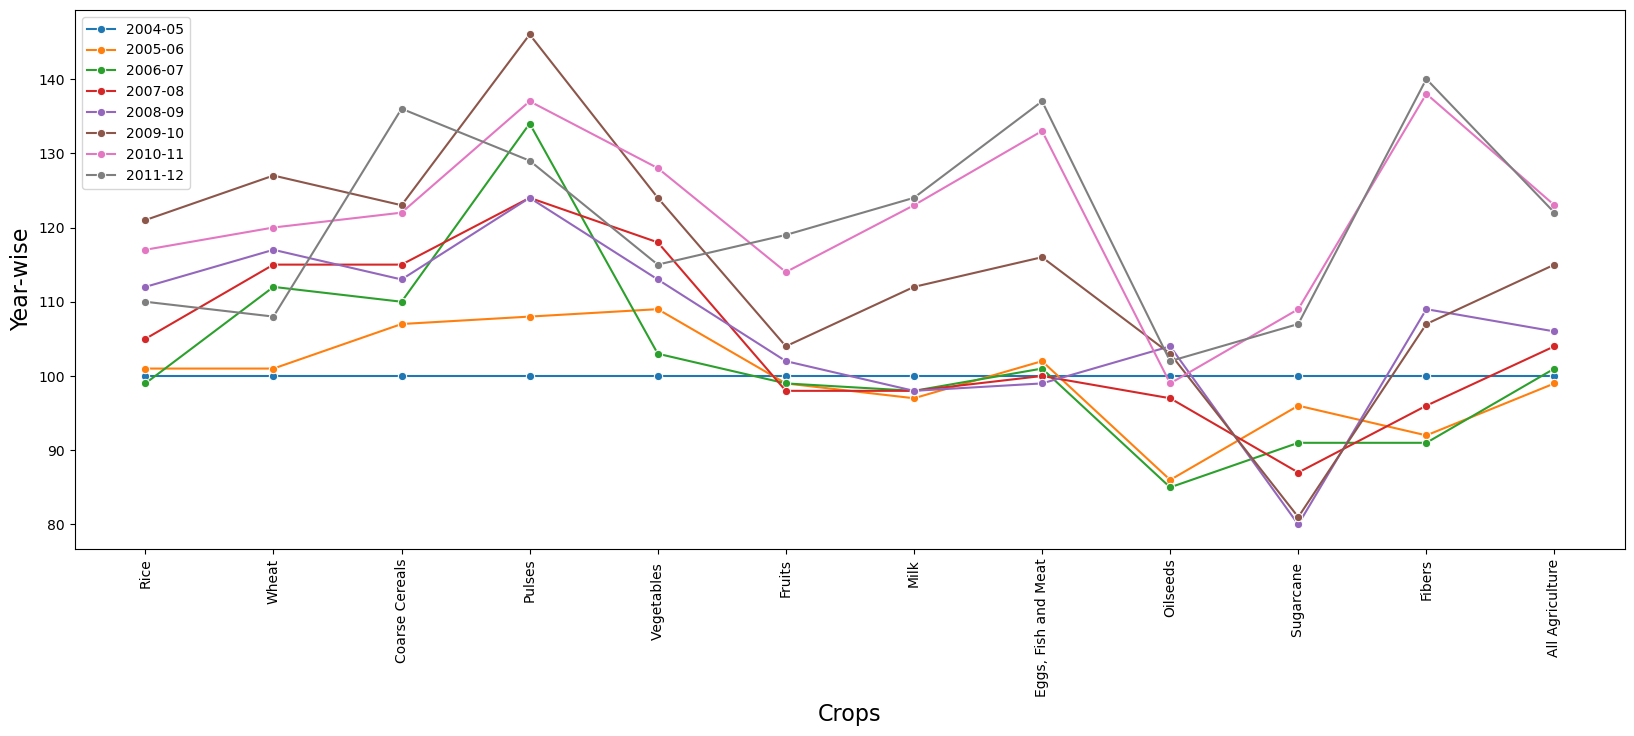

In [17]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="Crop",y="2004-05",marker='o',label='2004-05')
sns.lineplot(data=df,x="Crop",y="2005-06",marker='o',label='2005-06')
sns.lineplot(data=df,x="Crop",y="2006-07",marker='o',label='2006-07')
sns.lineplot(data=df,x="Crop",y="2007-08",marker='o',label='2007-08')
sns.lineplot(data=df,x="Crop",y="2008-09",marker='o',label='2008-09')
sns.lineplot(data=df,x="Crop",y="2009-10",marker='o',label='2009-10')
sns.lineplot(data=df,x="Crop",y="2010-11",marker='o',label='2010-11')
sns.lineplot(data=df,x="Crop",y="2011-12",marker='o',label='2011-12')
plt.xticks(rotation=90)
plt.xlabel('Crops', fontsize = 16)
plt.ylabel('Year-wise', fontsize = 16)
plt.show()

array([[<Axes: title={'center': '2004-05'}>,
        <Axes: title={'center': '2005-06'}>,
        <Axes: title={'center': '2006-07'}>],
       [<Axes: title={'center': '2007-08'}>,
        <Axes: title={'center': '2008-09'}>,
        <Axes: title={'center': '2009-10'}>],
       [<Axes: title={'center': '2010-11'}>,
        <Axes: title={'center': '2011-12'}>, <Axes: >]], dtype=object)

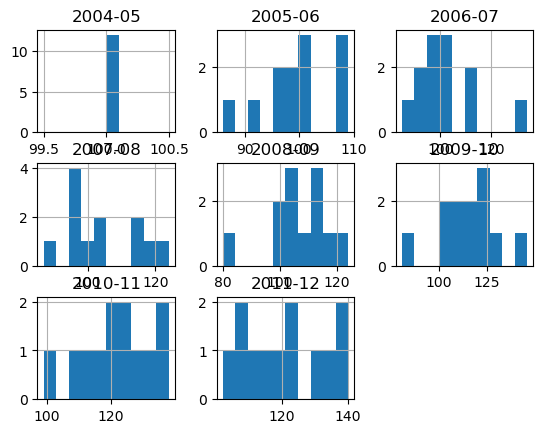

In [18]:
df.hist()

#### ◆ Pie Visualization

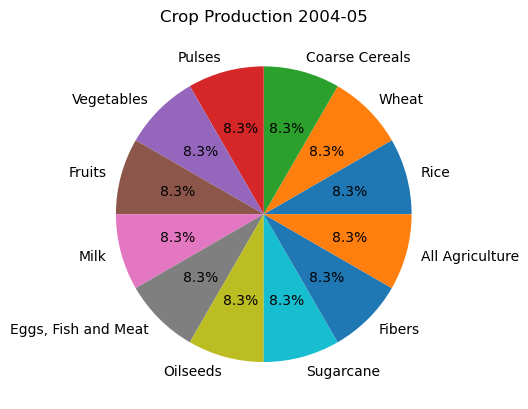

In [27]:
x = [100,100,100,100,100,100,100,100,100,100,100,100]
y = ["Rice","Wheat","Coarse Cereals","Pulses","Vegetables","Fruits","Milk","Eggs, Fish and Meat","Oilseeds","Sugarcane", 
"Fibers","All Agriculture"]

plt.pie(x,labels = y,autopct = "%0.1f%%")
plt.title("Crop Production 2004-05")
plt.show()

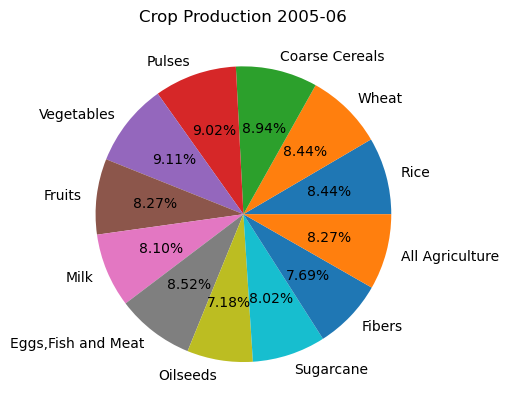

In [70]:
x = [101,101,107,108,109,99,97,102,86,96,92,99]
y = ["Rice","Wheat","Coarse Cereals","Pulses","Vegetables","Fruits","Milk","Eggs,Fish and Meat","Oilseeds","Sugarcane", 
"Fibers","All Agriculture"]

plt.pie(x,labels = y,autopct = "%.2f%%")
plt.title("Crop Production 2005-06")
plt.show()

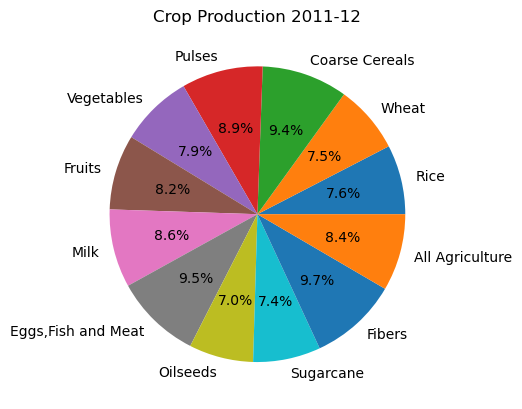

In [32]:
x = [110,108,136,129,115,119,124,137,102,107,140,122]
y = ["Rice","Wheat","Coarse Cereals","Pulses","Vegetables","Fruits","Milk","Eggs,Fish and Meat","Oilseeds","Sugarcane", 
"Fibers","All Agriculture"]

plt.pie(x,labels = y,autopct = "%.1f%%")
plt.title("Crop Production 2011-12")
plt.show()